Continue with PJMW_MW Analysis with (stationarity ,differencing and models)...

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import datetime
from datetime import timedelta,datetime
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
import statsmodels.api as sm
import seaborn as sns

In [3]:
#loading clean data from eda
data1=pd.read_csv('data.csv',header=0,index_col=0,parse_dates=True)
data1.head()

,energy,date,year,month,month_name,week_of_year,quarter,day_of_week,day_of_week_name,day_of_month,day_of_year,hour,time,holidays,season
Datetime,,,,,,,,,,,,,,,
2002-04-01 01:00:00,4374.0,2002-04-01,2002,4,April,14,2,0,Monday,1,91,1,01:00:00,0,winter
2002-04-01 02:00:00,4306.0,2002-04-01,2002,4,April,14,2,0,Monday,1,91,2,02:00:00,0,winter
2002-04-01 03:00:00,4322.0,2002-04-01,2002,4,April,14,2,0,Monday,1,91,3,03:00:00,0,winter
2002-04-01 04:00:00,4359.0,2002-04-01,2002,4,April,14,2,0,Monday,1,91,4,04:00:00,0,winter
2002-04-01 05:00:00,4436.0,2002-04-01,2002,4,April,14,2,0,Monday,1,91,5,05:00:00,0,winter


In [4]:
data1.shape

(143232, 15)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143232 entries, 2002-04-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   energy            143232 non-null  float64
 1   date              143232 non-null  object 
 2   year              143232 non-null  int64  
 3   month             143232 non-null  int64  
 4   month_name        143232 non-null  object 
 5   week_of_year      143232 non-null  int64  
 6   quarter           143232 non-null  int64  
 7   day_of_week       143232 non-null  int64  
 8   day_of_week_name  143232 non-null  object 
 9   day_of_month      143232 non-null  int64  
 10  day_of_year       143232 non-null  int64  
 11  hour              143232 non-null  int64  
 12  time              143232 non-null  object 
 13  holidays          143232 non-null  int64  
 14  season            143232 non-null  object 
dtypes: float64(1), int64(9), object(5)

### Down Sampling

In [6]:
# taking only energy columns 
df=data1.loc[:,'energy']
df=pd.DataFrame(df)
df

,energy
Datetime,
2002-04-01 01:00:00,4374.0
2002-04-01 02:00:00,4306.0
2002-04-01 03:00:00,4322.0
2002-04-01 04:00:00,4359.0
2002-04-01 05:00:00,4436.0
...,...
2018-08-02 20:00:00,6545.0
2018-08-02 21:00:00,6496.0
2018-08-02 22:00:00,6325.0


In [7]:
# converting the hourly data into monthly  data
data1=df.resample(rule='D').mean()
data=data1.asfreq('D')
data

,energy
Datetime,
2002-04-01,5271.173913
2002-04-02,5310.416667
2002-04-03,5325.916667
2002-04-04,5670.791667
2002-04-05,5686.125000
...,...
2018-07-30,5492.708333
2018-07-31,5660.750000
2018-08-01,5959.708333


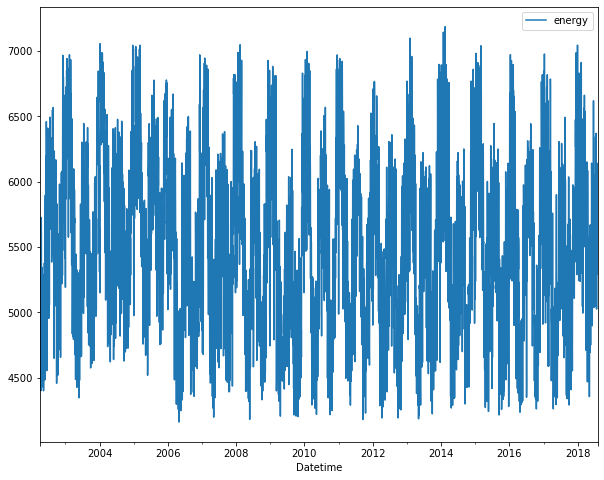

In [8]:
data.plot(figsize=(10,8))
plt.show()

### Stationarity

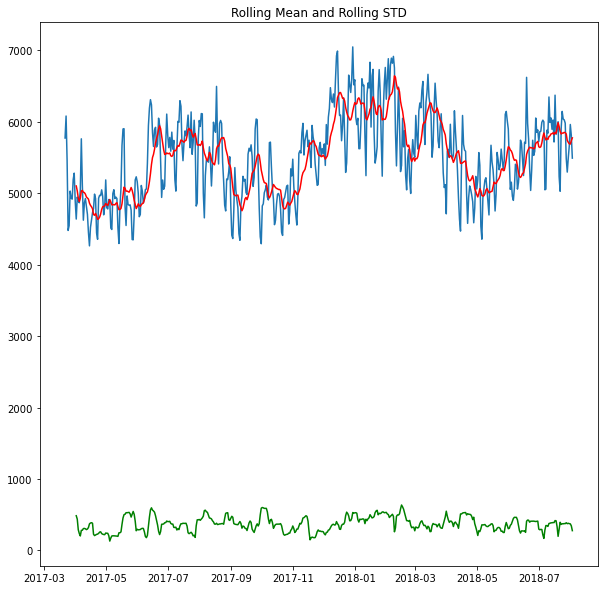

In [9]:
# Deteermining rolling statsics
rolling_mean = data.tail(500).energy.rolling(12).mean()
rolling_std = data.tail(500).energy.rolling(12).std()


plt.figure(figsize=(10,10))
plt.plot(data.tail(500).energy)
plt.plot(rolling_mean,color="red")
plt.plot(rolling_std,color="green")
plt.title("Rolling Mean and Rolling STD")
plt.show()

### Dickey Fuller Test

In [10]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.energy.dropna(), autolag= 'AIC')
print("1. ADF :" , dftest[0])
print("2. P-Value :" , dftest[1])
print("3. Num of lags :" , dftest[2])
print("4. No of obs used for ADF regression and critical value calculation :" , dftest[3])
print("5. Critical Values: ")
for key, val in dftest[4].items():
    print("\t",key, ": " , val)

1. ADF : -7.347951318652203
2. P-Value : 1.023766647006949e-10
3. Num of lags : 33
4. No of obs used for ADF regression and critical value calculation : 5935
5. Critical Values: 
	 1% :  -3.43145229664056
	 5% :  -2.8620271128107553
	 10% :  -2.56702928783387


## Autocorrelation Plot

In [11]:
from pandas.plotting import autocorrelation_plot

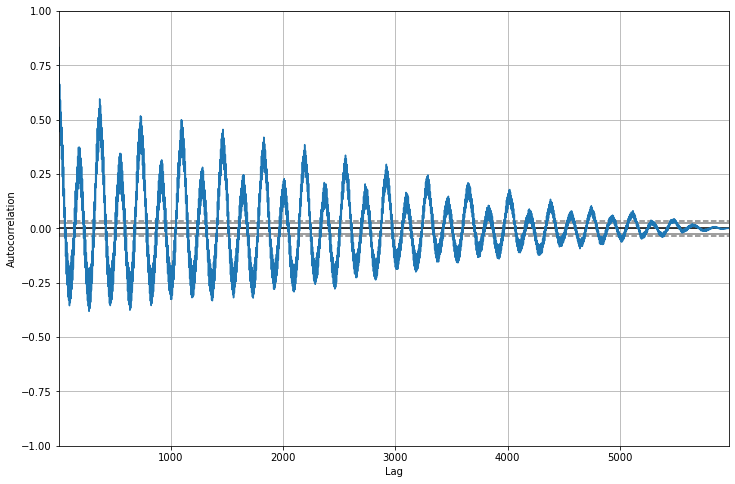

In [12]:
plt.figure(figsize=(12,8))
autocorrelation_plot(data['energy'])
plt.show()

### ACF AND PACF PLOTS

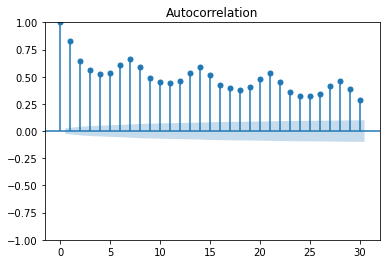

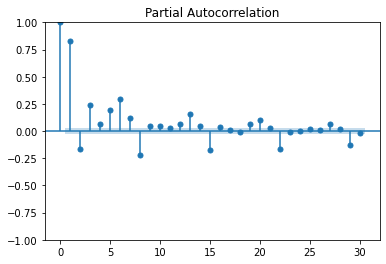

In [13]:
sm.graphics.tsa.plot_acf(data['energy'],lags=30)
sm.graphics.tsa.plot_pacf(data['energy'],lags=30)

plt.show()

### Differencing to remove the seasonality

### with 7 days

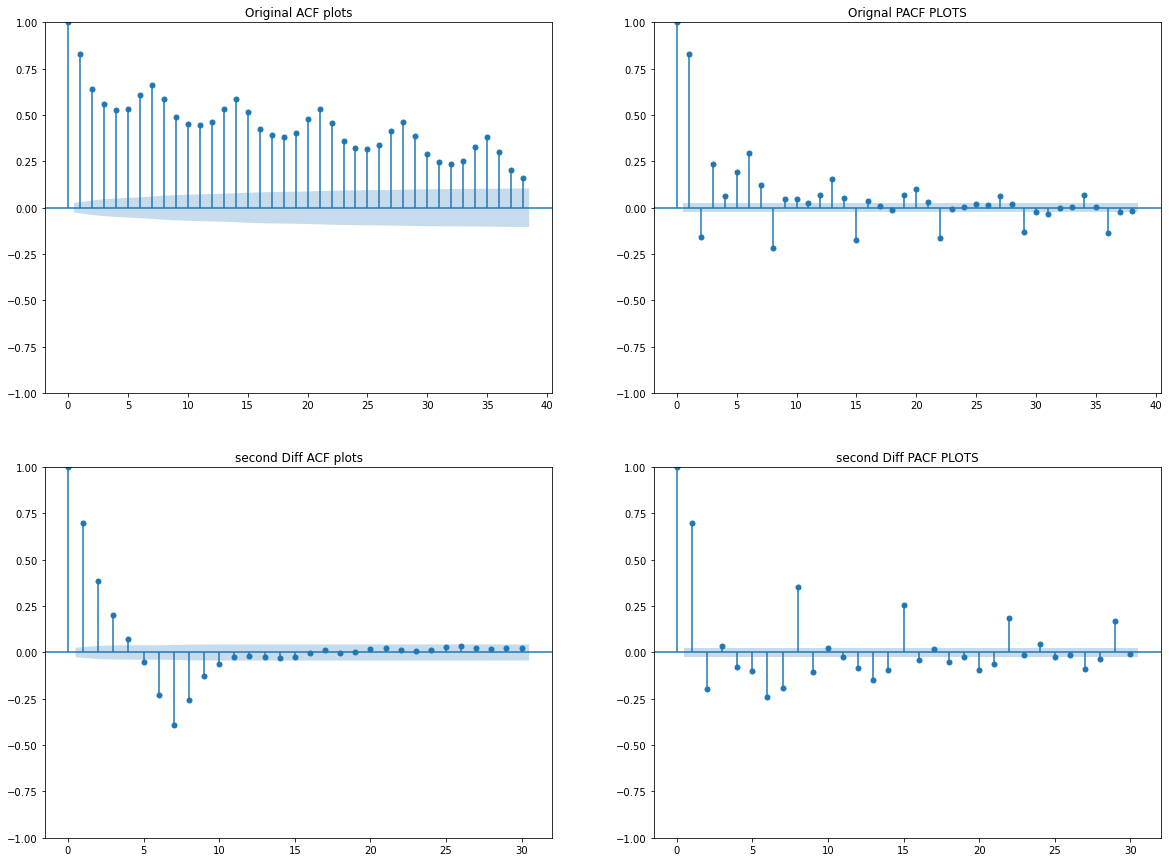

In [14]:
#original series acf and pacf plots
fig,axes=plt.subplots(2,2,figsize=(20,15))
sm.graphics.tsa.plot_acf(data['energy'],ax=axes[0,0]); axes[0,0].set_title('Original ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'],ax=axes[0,1]); axes[0,1].set_title('Orignal PACF PLOTS')

# differnced series acf and pacf plots
sm.graphics.tsa.plot_acf(data['energy'].diff(7).dropna(),lags=30,ax=axes[1,0]); axes[1,0].set_title('second Diff ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'].diff(7).dropna(),lags=30,ax=axes[1,1]); axes[1,1].set_title('second Diff PACF PLOTS')
plt.show()

## Double differencing with 7 days

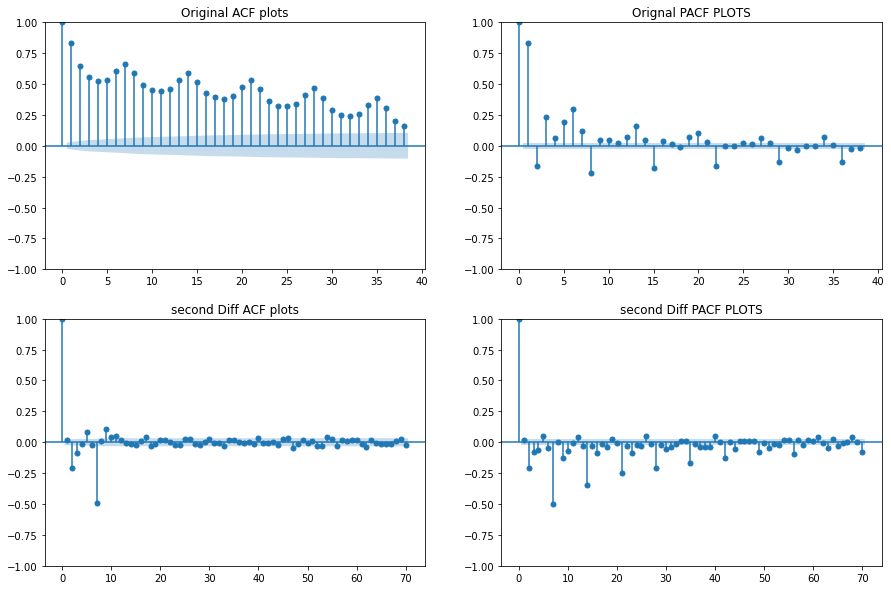

In [18]:
#original series acf and pacf plots
fig,axes=plt.subplots(2,2,figsize=(15,10))
sm.graphics.tsa.plot_acf(data['energy'],ax=axes[0,0]); axes[0,0].set_title('Original ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'],ax=axes[0,1]); axes[0,1].set_title('Orignal PACF PLOTS')

# differnced series acf and pacf plots
sm.graphics.tsa.plot_acf(data['energy'].diff(7).diff().dropna(),lags=70,ax=axes[1,0]); axes[1,0].set_title('second Diff ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'].diff(7).diff().dropna(),lags=70,ax=axes[1,1]); axes[1,1].set_title('second Diff PACF PLOTS')
plt.show()

### Dividing The Data into Training and Test Split

In [20]:
# splitting the data inot train n test
cut_of='2017-08-04'
train=data[:cut_of]
test=data[cut_of:]

In [21]:
pred_strt_date=test.index[0]
pred_end_date=test.index[-1]

In [22]:
train.shape

(5605, 1)

In [23]:
test.shape

(365, 1)

## Model Building

### AUTO ARIMA 

In [24]:
from pmdarima.arima import auto_arima
a=auto_arima(data['energy'],Trace=True,suppress_warnings=True)
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5969
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -42468.559
Date:                Wed, 19 Oct 2022   AIC                          84955.117
Time:                        12:45:31   BIC                          85015.365
Sample:                    04-01-2002   HQIC                         84976.045
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2537      0.020     12.659      0.000       0.214       0.293
ar.L2         -0.9343      0.013    -69.825      0.000      -0.961      -0.908
ar.L3          0.3955      0.028     14.228      0.000       0.341       0.450
ar.L4         -0.3309      0.013    -26.107      0.000      -0.356      -0.306
ar.L5         -0.1859      0.016    -11.956      0.000      -0.216      -0.155
ma.L1         -0.2985      0.017    -17.494      0.000      -0.332      -0.265
ma.L2          0.6409      0.009     73.386      0.000       0.624       0.658
ma.L3         -0.7039      0.017    -41.832      0.000      -0.737      -0.671
sigma2      9.329e+04   1613.341     57.824      0.000    9.01e+04    9.65e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):               105.41
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Arima Model

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
model=ARIMA(train['energy'],order=(5,1,3))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 energy   No. Observations:                 5605
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -39841.279
Date:                Wed, 19 Oct 2022   AIC                          79700.558
Time:                        12:47:24   BIC                          79760.239
Sample:                    04-01-2002   HQIC                         79721.355
                         - 08-04-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2538      0.020     12.467      0.000       0.214       0.294
ar.L2         -0.9399      0.013    -70.258      0.000      -0.966      -0.914
ar.L3          0.4027      0.028     14.168      0.000       0.347       0.458
ar.L4         -0.3330      0.013    -25.838      0.000      -0.358      -0.308
ar.L5         -0.1812      0.016    -11.392      0.000      -0.212      -0.150
ma.L1         -0.2970      0.017    -17.386      0.000      -0.330      -0.264
ma.L2          0.6489      0.008     79.088      0.000       0.633       0.665
ma.L3         -0.7188      0.017    -42.544      0.000      -0.752      -0.686
sigma2      9.213e+04   1630.926     56.492      0.000    8.89e+04    9.53e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):               109.95
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

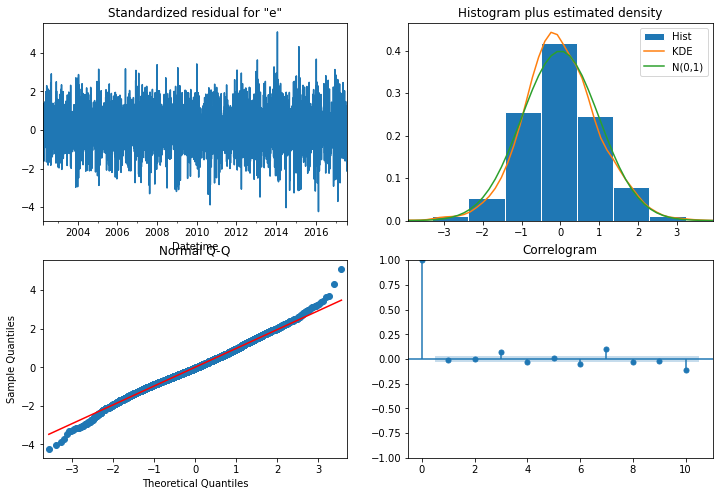

In [27]:
result.plot_diagnostics(figsize=(12,8))
plt.show()

### Forecast on test data

In [28]:
test['arima']=result.predict(start=pred_strt_date,end=pred_end_date,type='levels')
test.head()

,energy,arima
Datetime,,
2017-08-04,6108.875000,5981.450964
2017-08-05,4997.000000,5686.618070
2017-08-06,4653.291667,5585.881351
2017-08-07,5245.791667,5819.186280
2017-08-08,5461.625000,5771.453326


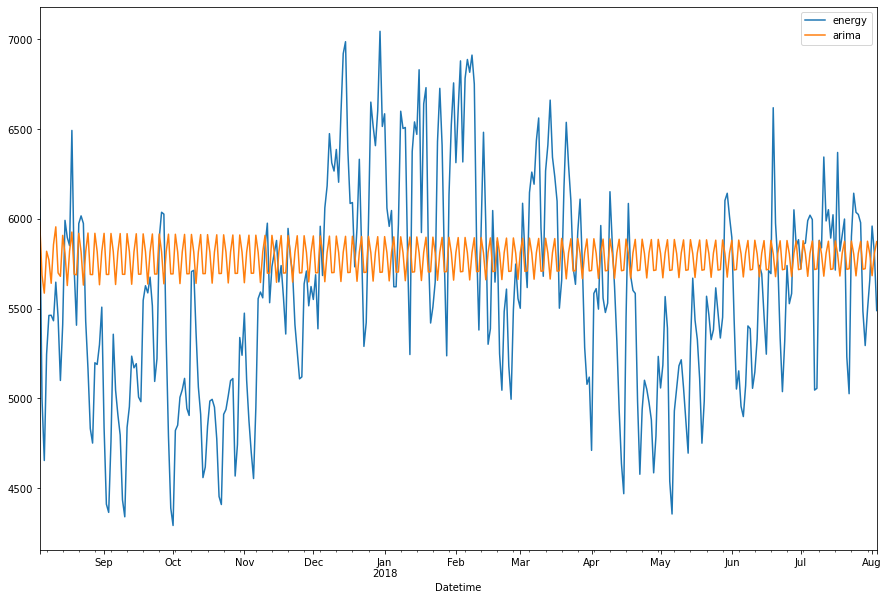

In [29]:
test[['energy','arima']].plot(figsize=(15,10))
plt.show()

### Evaluate the model

In [30]:
import numpy as np
from sklearn.metrics import mean_absolute_error

In [32]:
def forcast_acc(pred,org):
    mape=round(np.mean(np.abs(pred-org)/np.abs(pred))*100,2)
    mae=round(np.mean(np.abs(pred-org)),2)
    rmse = round(np.mean(np.abs(pred-org)**2)**.5,2)
    return({'MAPE':mape,'MAE':mae,'RMSE':rmse})

In [33]:
arima_metric=forcast_acc(test['arima'],test['energy'])
arima_metric

{'MAPE': 8.62, 'MAE': 498.28, 'RMSE': 608.17}

### SARIMAX MODEL

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
sarimax=SARIMAX(train['energy'],order=(1,1,3),seasonal_order=(1,1,0,7))
model2=sarimax.fit(disp=-1)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             energy   No. Observations:                 5605
Model:             SARIMAX(1, 1, 3)x(1, 1, [], 7)   Log Likelihood              -40152.568
Date:                            Wed, 19 Oct 2022   AIC                          80317.135
Time:                                    12:48:37   BIC                          80356.915
Sample:                                04-01-2002   HQIC                         80330.998
                                     - 08-04-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6357      0.021     30.653      0.000       0.595       0.676
ma.L1         -0.7546      0.943     -0.800      0.423      -2.602       1.093
ma.L2         -0.2742      0.230     -1.193      0.233      -0.725       0.176
ma.L3          0.0288      0.035      0.817      0.414      -0.040       0.098
ar.S.L7       -0.4709      0.010    -46.266      0.000      -0.491      -0.451
sigma2      9.955e+04   9.35e+04      1.065      0.287   -8.36e+04    2.83e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               301.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

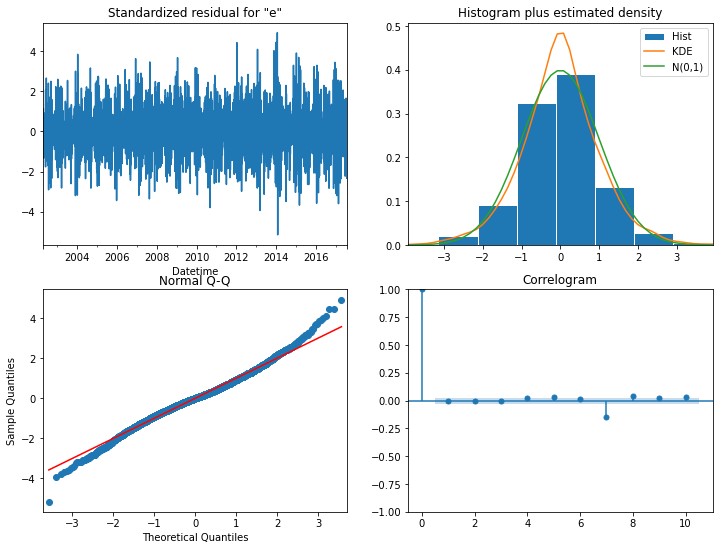

In [36]:
model2.plot_diagnostics(figsize=(12,9))
plt.show()

#### Forecast on Test Data

In [37]:
test['sarimax_7days']=model2.predict(start=pred_strt_date,end=pred_end_date)
test.head()

,energy,arima,sarimax_7days
Datetime,,,
2017-08-04,6108.875000,5981.450964,6004.975534
2017-08-05,4997.000000,5686.618070,5451.980496
2017-08-06,4653.291667,5585.881351,5322.165269
2017-08-07,5245.791667,5819.186280,5997.813293
2017-08-08,5461.625000,5771.453326,5833.030653


<AxesSubplot:xlabel='Datetime'>

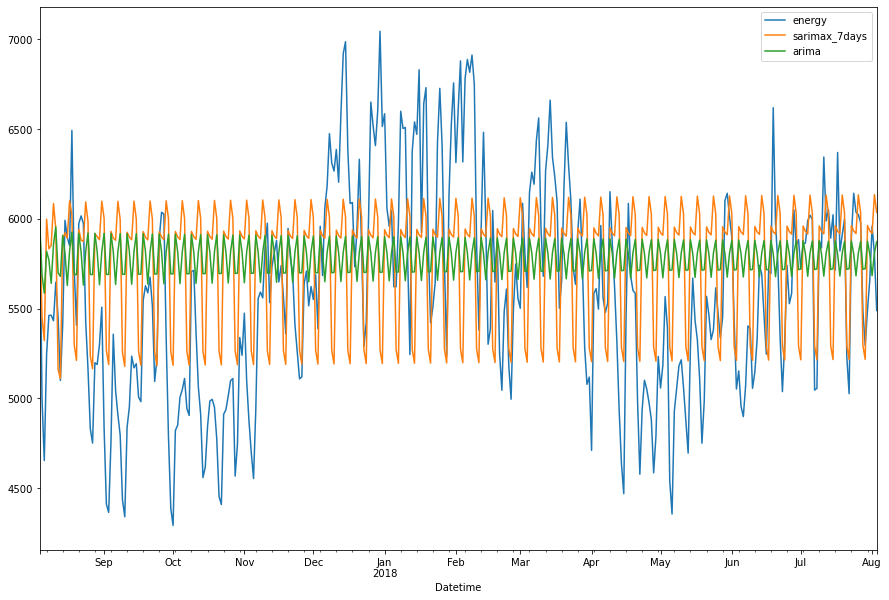

In [38]:
test[['energy','sarimax_7days','arima']].plot(figsize=(15,10))

#### Evaluate the model

In [39]:
sarimax_7=forcast_acc(test['sarimax_7days'],test['energy'])
sarimax_7

{'MAPE': 8.6, 'MAE': 494.7, 'RMSE': 599.9}

### differncing with 70 days

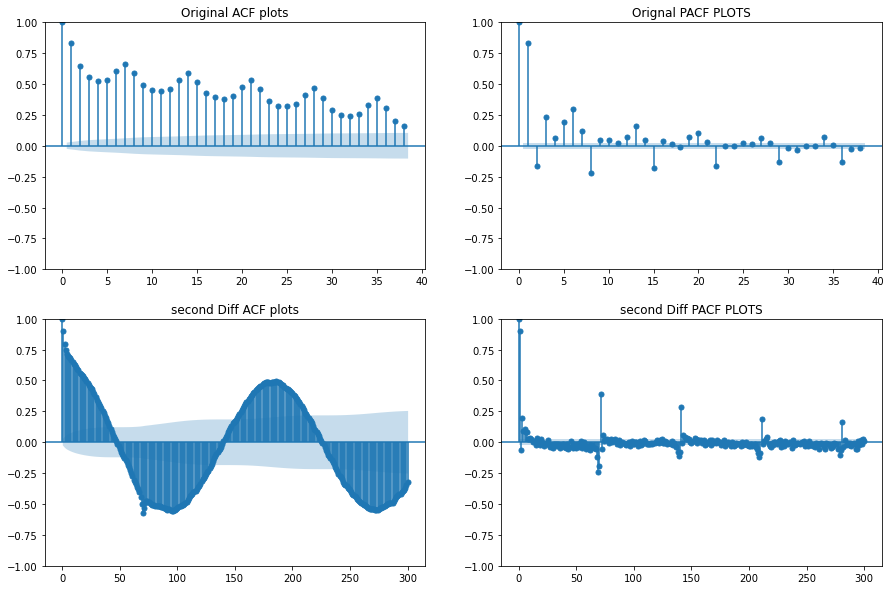

In [40]:
#original series acf and pacf plots
fig,axes=plt.subplots(2,2,figsize=(15,10))
sm.graphics.tsa.plot_acf(data['energy'],ax=axes[0,0]); axes[0,0].set_title('Original ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'],ax=axes[0,1]); axes[0,1].set_title('Orignal PACF PLOTS')

# differnced series acf and pacf plots
sm.graphics.tsa.plot_acf(data['energy'].diff(70).dropna(),lags=300,ax=axes[1,0]); axes[1,0].set_title('second Diff ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'].diff(70).dropna(),lags=300,ax=axes[1,1]); axes[1,1].set_title('second Diff PACF PLOTS')
plt.show()

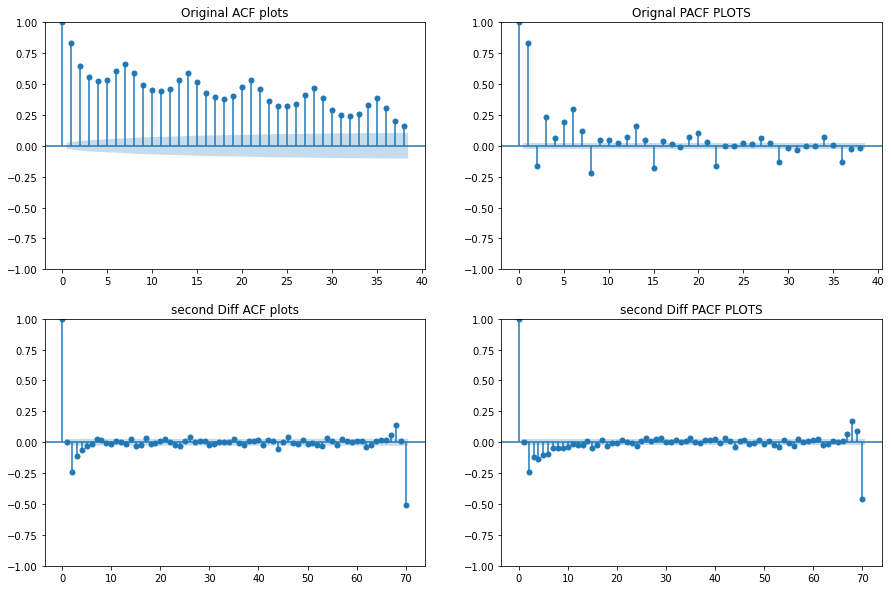

In [41]:
#original series acf and pacf plots
fig,axes=plt.subplots(2,2,figsize=(15,10))
sm.graphics.tsa.plot_acf(data['energy'],ax=axes[0,0]); axes[0,0].set_title('Original ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'],ax=axes[0,1]); axes[0,1].set_title('Orignal PACF PLOTS')

# differnced series acf and pacf plots
sm.graphics.tsa.plot_acf(data['energy'].diff(70).diff().dropna(),lags=70,ax=axes[1,0]); axes[1,0].set_title('second Diff ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'].diff(70).diff().dropna(),lags=70,ax=axes[1,1]); axes[1,1].set_title('second Diff PACF PLOTS')
plt.show()

### now building sarimax with 70 days

In [42]:
sarimax_70=SARIMAX(train,order=(2,1,3),seasonal_order=(1,1,0,70))
sarimax70=sarimax_70.fit(disp=-1)
sarimax70.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              energy   No. Observations:                 5605
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 70)   Log Likelihood              -39941.981
Date:                             Wed, 19 Oct 2022   AIC                          79897.962
Time:                                     13:00:32   BIC                          79944.293
Sample:                                 04-01-2002   HQIC                         79914.117
                                      - 08-04-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4323      0.140     -3.077      0.002      -0.708      -0.157
ar.L2          0.4311      0.062      6.997      0.000       0.310       0.552
ma.L1          0.3545      0.141      2.514      0.012       0.078       0.631
ma.L2         -0.7729      0.068    -11.284      0.000      -0.907      -0.639
ma.L3         -0.2369      0.045     -5.230      0.000      -0.326      -0.148
ar.S.L70      -0.5177      0.010    -50.221      0.000      -0.538      -0.497
sigma2      1.083e+05   1761.234     61.517      0.000    1.05e+05    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               163.56
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

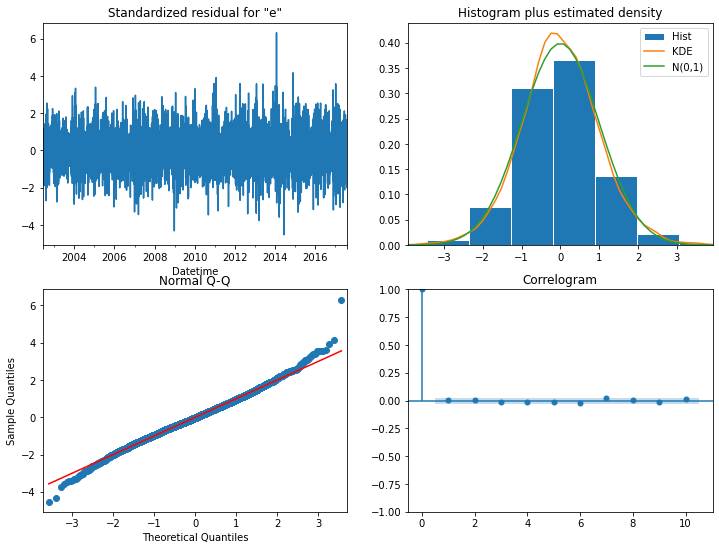

In [43]:
sarimax70.plot_diagnostics(figsize=(12,9))
plt.show()

### Forecast on test data

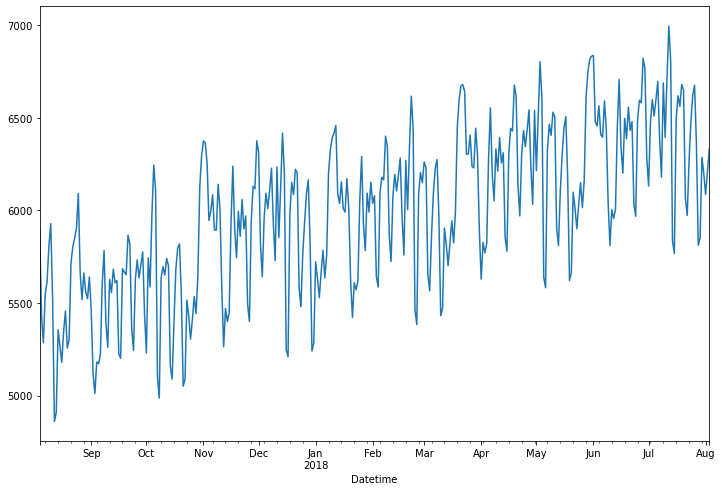

In [44]:
test['sarimax_70days']=sarimax70.predict(start=pred_strt_date,end=pred_end_date)
test['sarimax_70days'].plot(figsize=(12,8))
plt.show()

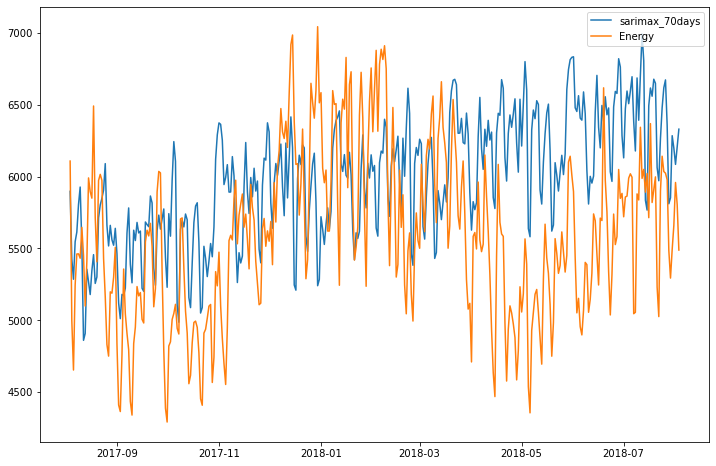

In [45]:
plt.figure(figsize=(12,8))
plt.plot(test['sarimax_70days'],label='sarimax_70days')
plt.plot(test['energy'],label='Energy')
plt.legend(loc='upper right')
plt.show()

#### Evaluate the model 

In [46]:
forcast_acc(test['sarimax_70days'],test['energy'])

{'MAPE': 10.13, 'MAE': 612.4, 'RMSE': 725.45}

### With 90 Days

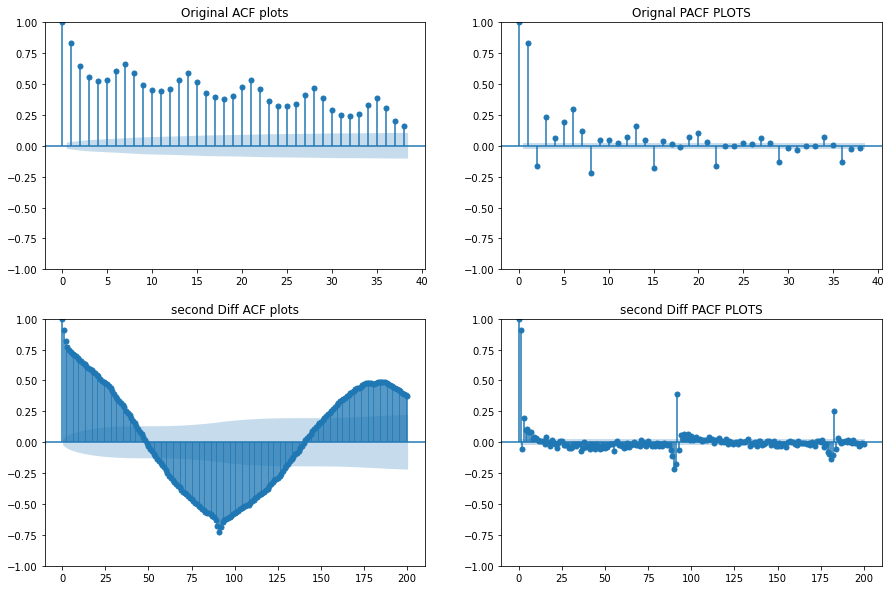

In [47]:
#original series acf and pacf plots
fig,axes=plt.subplots(2,2,figsize=(15,10))
sm.graphics.tsa.plot_acf(data['energy'],ax=axes[0,0]); axes[0,0].set_title('Original ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'],ax=axes[0,1]); axes[0,1].set_title('Orignal PACF PLOTS')

# differnced series acf and pacf plots
sm.graphics.tsa.plot_acf(data['energy'].diff(91).dropna(),lags=200,ax=axes[1,0]); axes[1,0].set_title('second Diff ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'].diff(91).dropna(),lags=200,ax=axes[1,1]); axes[1,1].set_title('second Diff PACF PLOTS')
plt.show()

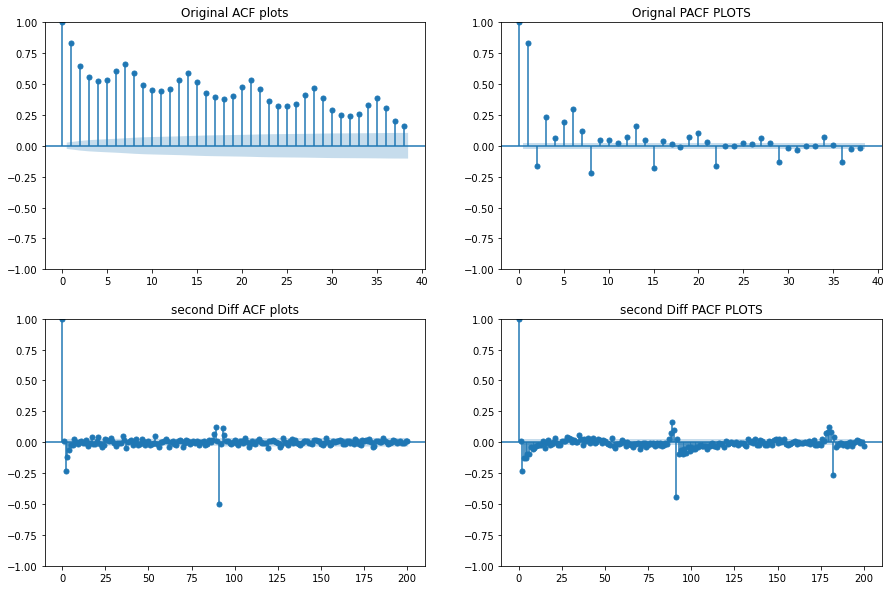

In [48]:
#original series acf and pacf plots
fig,axes=plt.subplots(2,2,figsize=(15,10))
sm.graphics.tsa.plot_acf(data['energy'],ax=axes[0,0]); axes[0,0].set_title('Original ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'],ax=axes[0,1]); axes[0,1].set_title('Orignal PACF PLOTS')

# differnced series acf and pacf plots
sm.graphics.tsa.plot_acf(data['energy'].diff(91).diff().dropna(),lags=200,ax=axes[1,0]); axes[1,0].set_title('second Diff ACF plots')
sm.graphics.tsa.plot_pacf(data['energy'].diff(91).diff().dropna(),lags=200,ax=axes[1,1]); axes[1,1].set_title('second Diff PACF PLOTS')
plt.show()

#### Building the  model with 91 days

In [51]:
sarimax_91days=SARIMAX(train,order=(2,1,3),seasonal_order=(1,1,0,91))
sarimax91days=sarimax_91days.fit(low_memory=True,cov_type='approx')
sarimax91days.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              energy   No. Observations:                 5605
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 91)   Log Likelihood              -39758.036
Date:                             Wed, 19 Oct 2022   AIC                          79530.071
Time:                                     16:12:32   BIC                          79576.375
Sample:                                 04-01-2002   HQIC                         79546.220
                                      - 08-04-2017                                         
Covariance Type:                            approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4959      0.019    -25.618      0.000      -0.534      -0.458
ar.L2          0.4972      0.021     23.823      0.000       0.456       0.538
ma.L1          0.4057      0.020     19.955      0.000       0.366       0.446
ma.L2         -0.8622      0.008   -106.148      0.000      -0.878      -0.846
ma.L3         -0.2738      0.016    -16.595      0.000      -0.306      -0.241
ar.S.L91      -0.5335      0.012    -45.549      0.000      -0.556      -0.511
sigma2      1.071e+05   2039.842     52.482      0.000    1.03e+05    1.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                89.97
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

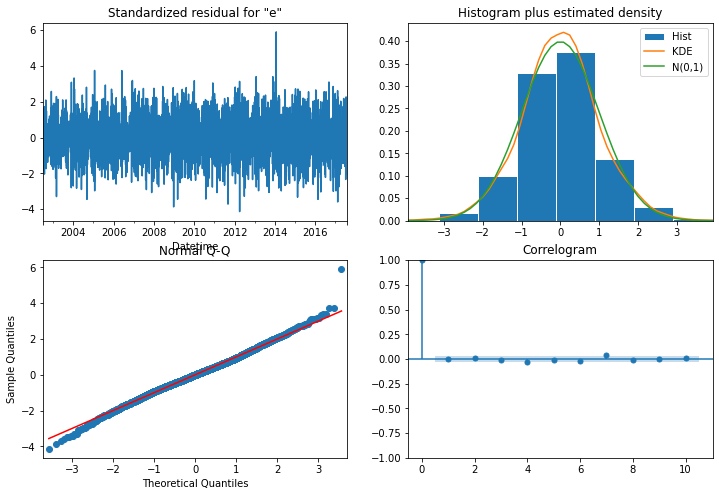

In [53]:
sarimax91days.plot_diagnostics(figsize=(12,8))
plt.show()

#### Forecast on test data set


<AxesSubplot:xlabel='Datetime'>

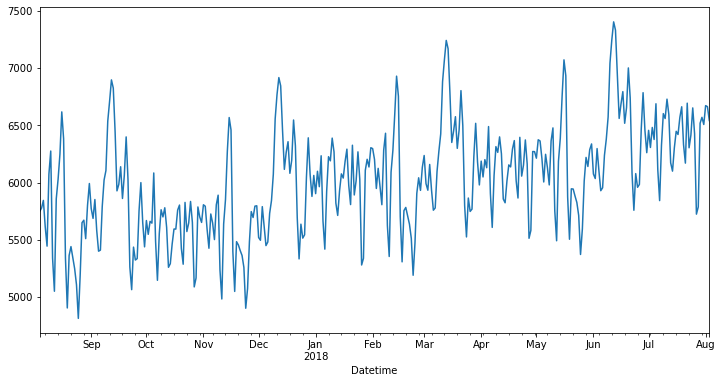

In [56]:
test['sarimax91days']=sarimax91days.predict(start=pred_strt_date,end=pred_end_date)
test['sarimax91days'].plot(figsize=(12,6))

#### Evaluate the model mertics

In [58]:
sarimax91=forcast_acc(test['sarimax91days'],test['energy'])
sarimax91

{'MAPE': 10.43, 'MAE': 635.48, 'RMSE': 770.2}